In [1]:
# Importing modules
import pandas as pd
import os
import numpy as np
import re


os.chdir('..')

# Read data into papers
papers = pd.read_csv('D:\Anaconda\python\scopus1.csv')

# Print head
papers.head()

,Authors,Author full names,Author(s) ID,Year,Source title,DOI,Link,Affiliations,Authors with affiliations,Abstract,Indexed Keywords,Author Keywords,Document Type,Source
0,Fitzgerald K.; Devonshire E.; Vaughan B.,"Fitzgerald, Kylie (23990834600); Devonshire, E...",23990834600; 54994531800; 16235143200,2020,Health Professions Education,10.1016/j.hpe.2020.09.001,https://www.scopus.com/inward/record.uri?eid=2...,"The Pain Management Research Institute, Sydney...","Fitzgerald K., The Pain Management Research In...",Purpose: The global burden of pain is consider...,NaN,Attitudes; Back pain; Curriculum; Education; O...,Article,Scopus
1,NaN,NaN,NaN,2020,Hematology. American Society of Hematology. Ed...,10.1182/hematology.2020Erratum1,https://www.scopus.com/inward/record.uri?eid=2...,NaN,NaN,[No abstract available],erratum,NaN,Erratum,Scopus
2,Gembris H.; Menze J.; Heye A.; Bullerjahn C.,"Gembris, Heiner (56404579500); Menze, Jonas (5...",56404579500; 57219867409; 57211967141; 5644582...,2020,Frontiers in Psychology,10.3389/fpsyg.2020.564736,https://www.scopus.com/inward/record.uri?eid=2...,"Faculty of Cultural Studies, Institute for Res...","Gembris H., Faculty of Cultural Studies, Insti...","The present study examines the prevalence, loc...",NaN,adolescents; high performers; music education;...,Article,Scopus
3,Kim S.-W.,"Kim, Seong-Woo (54399892700)",54399892700,2020,Proceedings of 2020 IEEE International Confere...,10.1109/TALE48869.2020.9368332,https://www.scopus.com/inward/record.uri?eid=2...,"Seoul National University, Graduate School of ...","Kim S.-W., Seoul National University, Graduate...",The fundamentally-required literacy in higher ...,Computer programming; Machine learning; Studen...,Artificial intelligence; Engineering literacy;...,Conference paper,Scopus
4,Benedicto J.; Echaves A.; Jurado T.; Ramos M.;...,"Benedicto, Jorge (6603612542); Echaves, Antoni...",6603612542; 57222029480; 57191157882; 57203283...,2020,Revista Espanola de Sociologia,10.22325/FES/RES.2020.78,https://www.scopus.com/inward/record.uri?eid=2...,"Universidad Nacional de Educación a Distancia,...","Benedicto J., Universidad Nacional de Educació...",Based on the results of a survey carried out i...,NaN,Crisis; Emancipation; Precariousness; Youth,Review,Scopus


In [2]:
papers.shape

(1000, 14)

In [3]:
# Remove the columns
Papers = papers.drop(columns=['Author(s) ID', 'Link', 'Author full names','DOI','Document Type','Source'], axis=1).sample(1000)

# Print out the first rows of papers
Papers.head()

,Authors,Year,Source title,Affiliations,Authors with affiliations,Abstract,Indexed Keywords,Author Keywords
244,Sainz V.; Jacott L.,2020,Revista Internacional de Educacion para la Jus...,"Universidad Francisco de Vitoria, Spain; Unive...","Sainz V., Universidad Francisco de Vitoria, Sp...",This article describes the process of construc...,NaN,Secondary education; Social justice; Social re...
337,Podila L.M.; Bandreddi J.P.; Campos J.I.; Niya...,2020,Proceedings of 2020 IEEE International Confere...,"The University of Toledo, EECS Department, Tol...","Podila L.M., The University of Toledo, EECS De...",Advancements in technology and the increase in...,Malware; Smartphones; Students; Cyber security...,Cybersecurity education; Security mindset; Sma...
682,Ding X.; Cai Z.; Zhu W.; Fu Z.,2020,Healthcare (Switzerland),"School of Finance and Economics, Institute of ...","Ding X., School of Finance and Economics, Inst...",Access to public health services is a cause th...,NaN,COVID-19 crisis; European Union; Public health...
212,Zhang Q.-L.; Xu N.; Huang S.-T.; Chen Q.; Cao H.,2020,Heart Surgery Forum,"Department of Cardiac Surgery, Affiliated Hosp...","Zhang Q.-L., Department of Cardiac Surgery, Af...",Background: This study explored the clinical e...,Adolescent; Adult; Cardiac Surgical Procedures...,NaN
219,Abowitz K.K.; Mamlok D.,2020,Educational Theory,"Department of Educational Leadership, Miami Un...","Abowitz K.K., Department of Educational Leader...","In this essay, Kathleen Knight Abowitz and Dan...",NaN,agonism; articulation; citizenship education; ...


In [4]:
Papers.isnull().sum()

Authors                        7
Year                           0
Source title                   0
Affiliations                  12
Authors with affiliations     12
Abstract                       0
Indexed Keywords             404
Author Keywords              202
dtype: int64

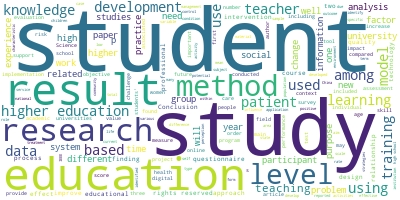

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(Papers['Abstract'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop_words.extend(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
                   'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
                   'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
                   'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
                   'into', 'through', 'during', 'before', 'after', 'above', 
                   'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 
                   'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', 
                   "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
                   'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = Papers.Abstract.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['article', 'describes', 'process', 'construction', 'validation', 'two', 'instruments', 'designed', 'evaluate', 'representations', 'students', 'teachers', 'social', 'justice', 'perspective', 'takes', 'account', 'three', 'dimensions', 'proposed', 'nancy', 'fraser', 'redistribution', 'recognition', 'representation', 'participation', 'end', 'social', 'justice', 'representations']


In [8]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1)]


In [9]:
#Model traning
from pprint import pprint

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"students" + 0.012*"study" + 0.008*"education" + 0.006*"higher" + '
  '0.006*"based" + 0.005*"learning" + 0.005*"high" + 0.005*"teaching" + '
  '0.004*"health" + 0.004*"analysis"'),
 (1,
  '0.011*"students" + 0.006*"higher" + 0.006*"research" + 0.005*"study" + '
  '0.005*"education" + 0.005*"learning" + 0.004*"used" + 0.004*"analysis" + '
  '0.004*"results" + 0.004*"patients"'),
 (2,
  '0.009*"education" + 0.007*"higher" + 0.006*"study" + 0.005*"health" + '
  '0.005*"results" + 0.005*"research" + 0.004*"high" + 0.004*"level" + '
  '0.004*"students" + 0.004*"based"'),
 (3,
  '0.011*"education" + 0.009*"learning" + 0.009*"students" + 0.009*"study" + '
  '0.008*"higher" + 0.007*"research" + 0.005*"data" + 0.005*"educational" + '
  '0.004*"health" + 0.004*"results"'),
 (4,
  '0.007*"education" + 0.007*"data" + 0.004*"results" + 0.004*"study" + '
  '0.004*"work" + 0.004*"high" + 0.004*"students" + 0.003*"health" + '
  '0.003*"participants" + 0.003*"research"'),
 (5,
  '0.016*"

In [10]:
import pyLDAvis.gensim as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('D:\Anaconda\python'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'D:\Anaconda\python'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.017300  0.004645       1        1  15.887967
5     -0.023870 -0.024473       2        1   6.835587
19    -0.033952  0.019491       3        1   6.531400
15    -0.020597  0.005343       4        1   6.077769
8     -0.035108  0.014612       5        1   6.050598
11    -0.019310 -0.022931       6        1   5.794067
6      0.007303 -0.010382       7        1   5.657088
13    -0.017182 -0.016945       8        1   5.518351
0     -0.013280 -0.009396       9        1   5.086538
7      0.033942  0.000852      10        1   4.832046
18     0.043098 -0.012941      11        1   4.723264
1     -0.001735  0.008454      12        1   4.097397
16    -0.002207  0.018508      13        1   4.088833
9      0.009418  0.019413      14        1   3.848048
2      0.006252 -0.018982      15        1   3.764310
14    -0.004823  0.003671      16        1   3.180276
10     0.000093 -0.001979      17        1   3.178197
17    -0.002346  0.002707      18        1   2.000228
4      0.040594  0.047503      19        1   1.916206
12     0.051011 -0.027168      20        1   0.931829, topic_info=            Term         Freq        Total Category  logprob  loglift
62      students  1348.000000  1348.000000  Default  30.0000  30.0000
18     education  1574.000000  1574.000000  Default  29.0000  29.0000
110     learning   873.000000   873.000000  Default  28.0000  28.0000
63         study  1242.000000  1242.000000  Default  27.0000  27.0000
219       health   562.000000   562.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
171     analysis     3.287883   470.640566  Topic20  -6.0426  -0.2881
586     research     3.487189   765.975552  Topic20  -5.9837  -0.7163
285        based     3.236126   552.239638  Topic20  -6.0585  -0.4638
410          use     3.121184   390.744811  Topic20  -6.0946  -0.1541
434  educational     3.115640   518.067852  Topic20  -6.0964  -0.4379

[1629 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
11129      8  0.494506         abet
11129     13  0.164835         abet
11129     16  0.164835         abet
340        3  0.688140      abowitz
2443       1  0.285778       abrupt
...      ...       ...          ...
10225      6  0.760454       型感染率较高
10227      6  0.568525   子宫颈上皮内瘤样病变
10236      6  0.573113  是最常见的合并感染型别
10237      6  0.572457       每位女性采集
10240      6  0.761430        级中hpv

[6268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 20, 16, 9, 12, 7, 14, 1, 8, 19, 2, 17, 10, 3, 15, 11, 18, 5, 13])